In [63]:
import pandas as pd
import numpy as np
import sklearn
import pprint
from sklearn.datasets import load_breast_cancer

np.set_printoptions(edgeitems=30, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))

### 1. Ładowanie danych

In [80]:
raw_data = load_breast_cancer()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
print (raw_data_copy['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 2. Przegląd danych

In [85]:
print (raw_data_copy['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area' 'mean smoothness' 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry' 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error' 'area error' 'smoothness error' 'compactness error' 'concavity error' 'concave points error' 'symmetry error' 'fractal dimension error' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness' 'worst concavity' 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [84]:
print (raw_data_copy['data'][:3])

[[17.99 10.38 122.80 1001.00 0.12 0.28 0.30 0.15 0.24 0.08 1.09 0.91 8.59 153.40 0.01 0.05 0.05 0.02 0.03 0.01 25.38 17.33 184.60 2019.00 0.16 0.67 0.71 0.27 0.46 0.12]
 [20.57 17.77 132.90 1326.00 0.08 0.08 0.09 0.07 0.18 0.06 0.54 0.73 3.40 74.08 0.01 0.01 0.02 0.01 0.01 0.00 24.99 23.41 158.80 1956.00 0.12 0.19 0.24 0.19 0.28 0.09]
 [19.69 21.25 130.00 1203.00 0.11 0.16 0.20 0.13 0.21 0.06 0.75 0.79 4.58 94.03 0.01 0.04 0.04 0.02 0.02 0.00 23.57 25.53 152.50 1709.00 0.14 0.42 0.45 0.24 0.36 0.09]]


In [83]:
print (raw_data_copy['target'][:5])

[0 0 0 0 0]


### 3. Przygotowanie danych:

In [126]:
data = raw_data['data']
target = raw_data['target']

print (f'{data[:3]}\n')
print (target [:5])

[[17.99 10.38 122.80 1001.00 0.12 0.28 0.30 0.15 0.24 0.08 1.09 0.91 8.59 153.40 0.01 0.05 0.05 0.02 0.03 0.01 25.38 17.33 184.60 2019.00 0.16 0.67 0.71 0.27 0.46 0.12]
 [20.57 17.77 132.90 1326.00 0.08 0.08 0.09 0.07 0.18 0.06 0.54 0.73 3.40 74.08 0.01 0.01 0.02 0.01 0.01 0.00 24.99 23.41 158.80 1956.00 0.12 0.19 0.24 0.19 0.28 0.09]
 [19.69 21.25 130.00 1203.00 0.11 0.16 0.20 0.13 0.21 0.06 0.75 0.79 4.58 94.03 0.01 0.04 0.04 0.02 0.02 0.00 23.57 25.53 152.50 1709.00 0.14 0.42 0.45 0.24 0.36 0.09]]

[0 0 0 0 0]


In [127]:
all_data = np.c_[data,target]

all_data[:5]

array([[17.99, 10.38, 122.80, 1001.00, 0.12, 0.28, 0.30, 0.15, 0.24, 0.08, 1.09, 0.91, 8.59, 153.40, 0.01, 0.05, 0.05, 0.02, 0.03, 0.01, 25.38, 17.33, 184.60, 2019.00, 0.16, 0.67, 0.71, 0.27, 0.46, 0.12, 0.00],
       [20.57, 17.77, 132.90, 1326.00, 0.08, 0.08, 0.09, 0.07, 0.18, 0.06, 0.54, 0.73, 3.40, 74.08, 0.01, 0.01, 0.02, 0.01, 0.01, 0.00, 24.99, 23.41, 158.80, 1956.00, 0.12, 0.19, 0.24, 0.19, 0.28, 0.09, 0.00],
       [19.69, 21.25, 130.00, 1203.00, 0.11, 0.16, 0.20, 0.13, 0.21, 0.06, 0.75, 0.79, 4.58, 94.03, 0.01, 0.04, 0.04, 0.02, 0.02, 0.00, 23.57, 25.53, 152.50, 1709.00, 0.14, 0.42, 0.45, 0.24, 0.36, 0.09, 0.00],
       [11.42, 20.38, 77.58, 386.10, 0.14, 0.28, 0.24, 0.11, 0.26, 0.10, 0.50, 1.16, 3.44, 27.23, 0.01, 0.07, 0.06, 0.02, 0.06, 0.01, 14.91, 26.50, 98.87, 567.70, 0.21, 0.87, 0.69, 0.26, 0.66, 0.17, 0.00],
       [20.29, 14.34, 135.10, 1297.00, 0.10, 0.13, 0.20, 0.10, 0.18, 0.06, 0.76, 0.78, 5.44, 94.44, 0.01, 0.02, 0.06, 0.02, 0.02, 0.01, 22.54, 16.67, 152.20, 1575.

In [128]:
df = pd.DataFrame(data=numpy_concat, columns= list(raw_data['feature_names'].tolist()) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### 4. Analiza zbioru

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [91]:
df.describe().T.apply (lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
mean texture,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
mean perimeter,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
mean area,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
mean smoothness,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
mean compactness,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [120]:
# zmienna docelowa - klasa 1 nie moze zdominować tabeli
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

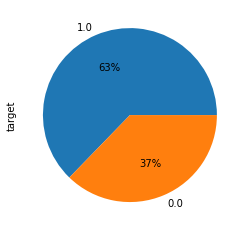

In [114]:
df['target'].value_counts().plot.pie(autopct = '%.0f%%')

### 5. Przygotowanie zbiorów testowych, treningowych

 - w poniższym przykładzie rozkład zmiennej docelowej we wszystkich zbiorach jest inny i może wpłynąć na model, wszędzie musi być taki sam - taki jak w pierwotnej zmiennej docelowej - target
 
 
- klasy w zbiorach testowych i treningowych powinny być tak samo zbilnasowane jak w całym zbiorze - df

In [146]:
from sklearn.model_selection import train_test_split

In [129]:
data = df.copy()
target = df.pop('target')

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40)

In [159]:
print (f'data shape: {data.shape}')
print (f'target shape: {target.shape}')
print (f'X_train shape: {X_train.shape}')
print (f'X_test shape: {X_test.shape}')
print (f'y_train shape: {y_train.shape}')
print (f'y_test shape: {y_test.shape}\n')

print (f'Train ratio {len(X_train) / len(data)}')
print (f'Test ratio {len(X_test) / len(data)}')

print (f'\nTarget\n{target.value_counts() / len(target)}')

print (f'\ny_train\n{y_train.value_counts() / len(y_train)}')
print (f'\ny_test\n{y_test.value_counts() / len(y_test)}')

data shape: (569, 31)
target shape: (569,)
X_train shape: (426, 31)
X_test shape: (143, 31)
y_train shape: (426,)
y_test shape: (143,)

Train ratio 0.7486818980667839
Test ratio 0.2513181019332162

Target
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train
1.0    0.607981
0.0    0.392019
Name: target, dtype: float64

y_test
1.0    0.685315
0.0    0.314685
Name: target, dtype: float64


#### - zmienne docelowe muszą być równo rozłożone w zbiorach - stratify=target

- gdy użyje random_state=42, to robi się równe ...

In [168]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, stratify=target)

In [169]:
print (f'data shape: {data.shape}')
print (f'target shape: {target.shape}')
print (f'X_train shape: {X_train.shape}')
print (f'X_test shape: {X_test.shape}')
print (f'y_train shape: {y_train.shape}')
print (f'y_test shape: {y_test.shape}\n')

print (f'Train ratio {len(X_train) / len(data)}')
print (f'Test ratio {len(X_test) / len(data)}')

print (f'\nTarget\n{target.value_counts() / len(target)}')

print (f'\ny_train\n{y_train.value_counts() / len(y_train)}')
print (f'\ny_test\n{y_test.value_counts() / len(y_test)}')

data shape: (569, 31)
target shape: (569,)
X_train shape: (426, 31)
X_test shape: (143, 31)
y_train shape: (426,)
y_test shape: (143,)

Train ratio 0.7486818980667839
Test ratio 0.2513181019332162

Target
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train
1.0    0.626761
0.0    0.373239
Name: target, dtype: float64

y_test
1.0    0.629371
0.0    0.370629
Name: target, dtype: float64


#### zmiana parametrów - test_size i train_size i pogląd podziału danych przy princie:

In [173]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.5, stratify=target)

In [178]:
print (f'data shape: {data.shape}')
print (f'target shape: {target.shape}')
print (f'X_train shape: {X_train.shape}')
print (f'X_test shape: {X_test.shape}')
print (f'y_train shape: {y_train.shape}')
print (f'y_test shape: {y_test.shape}\n')

print (f'Train ratio {len(X_train) / len(data):.4f}')
print (f'Test ratio {len(X_test) / len(data):.4f}')

print (f'\nTarget:\n{target.value_counts() / len(target)}')

print (f'\ny_train:\n{y_train.value_counts() / len(y_train)}')
print (f'\ny_test:\n{y_test.value_counts() / len(y_test)}')

data shape: (569, 31)
target shape: (569,)
X_train shape: (284, 31)
X_test shape: (285, 31)
y_train shape: (284,)
y_test shape: (285,)

Train ratio 0.4991
Test ratio 0.5009

Target:
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train:
1.0    0.626761
0.0    0.373239
Name: target, dtype: float64

y_test:
1.0    0.62807
0.0    0.37193
Name: target, dtype: float64
